<a href="https://colab.research.google.com/github/leticiavasconcelos1/analise_de_dados_python/blob/main/analise_de_dados_python/analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de Dados com python
##Wine Quality Dataset (Avaliação de vinhos)

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTAÇÃO DE BIBLIOTECAS

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Beatrizkrf/Aulas_PA/refs/heads/main/winequality-red.csv")
df.head()

# CARREGAR OS DADOS

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.isnull().sum()  #Verificando valores faltantes

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [5]:
df.info()

# Exibindo informações gerais dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
total_duplicatas = df.duplicated().sum()
print(f"Total de duplicatas encontradas: {total_duplicatas}")

df = df.drop_duplicates()

print(f"Total de duplicatas após a remoção: {df.duplicated().sum()}")

##remover as duplicatas

Total de duplicatas encontradas: 0
Total de duplicatas após a remoção: 0


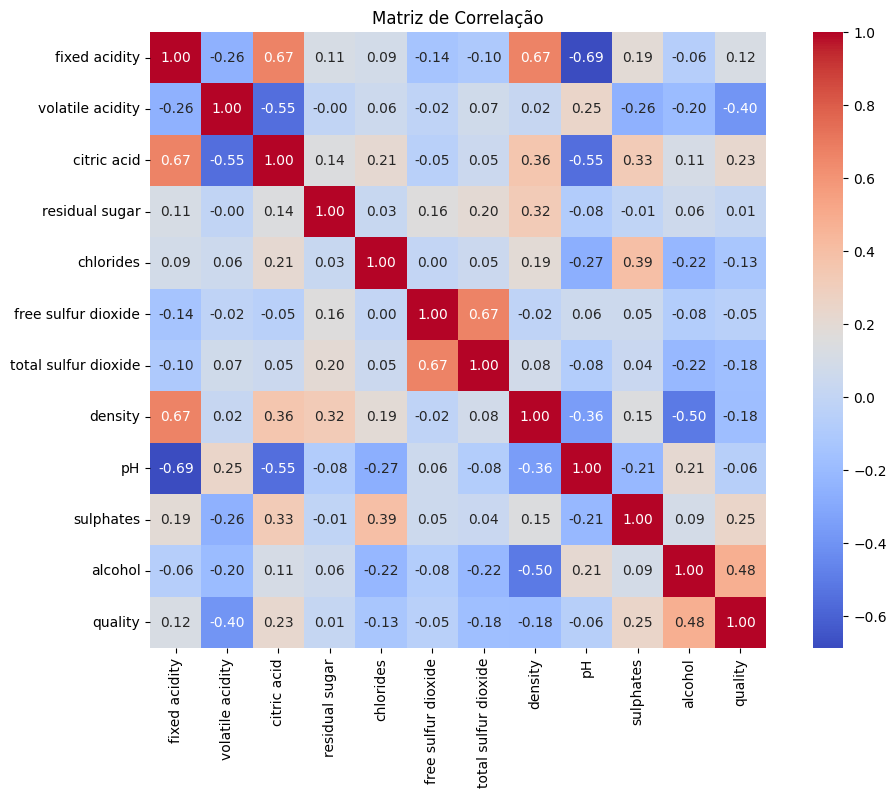

In [8]:
correlation_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlação')
plt.show()

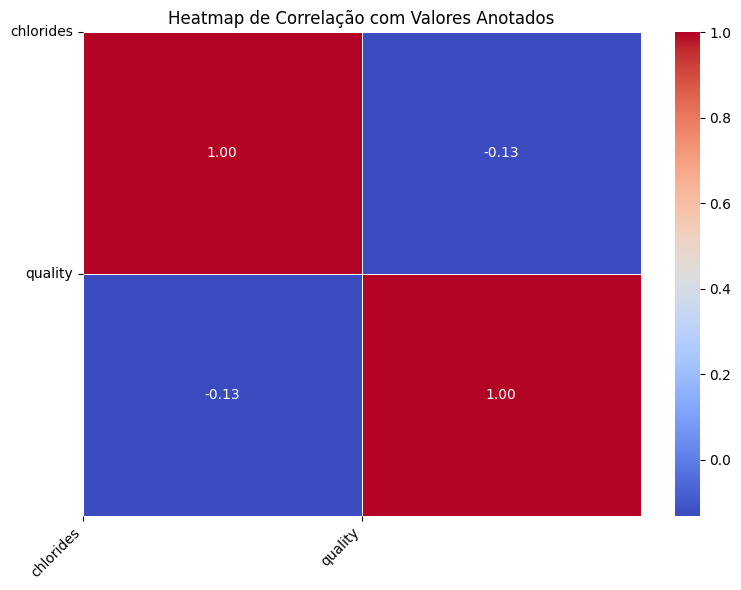

In [9]:
cols = ['chlorides','quality']
plot_data = df[cols]

corr = plot_data.corr()

plt.figure(figsize=(8, 6))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

plt.xticks(range(len(plot_data.columns)), plot_data.columns, rotation=45, ha='right')
plt.yticks(range(len(plot_data.columns)), plot_data.columns, rotation=0)
plt.title('Heatmap de Correlação com Valores Anotados')
plt.tight_layout()

plt.show()

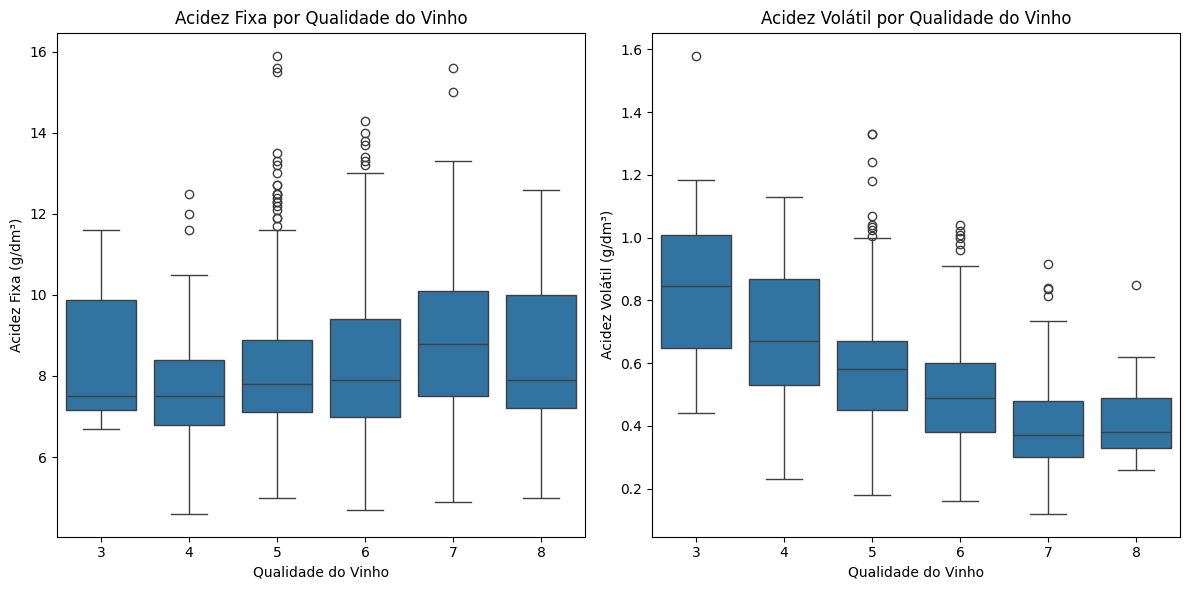

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # (linhas, colunas, índice)
sns.boxplot(x='quality', y='fixed acidity', data=df)
plt.title('Acidez Fixa por Qualidade do Vinho')
plt.xlabel('Qualidade do Vinho')
plt.ylabel('Acidez Fixa (g/dm³)')

# Criação do gráfico de box plot para acidez volátil
plt.subplot(1, 2, 2)
sns.boxplot(x='quality', y='volatile acidity', data=df)
plt.title('Acidez Volátil por Qualidade do Vinho')
plt.xlabel('Qualidade do Vinho')
plt.ylabel('Acidez Volátil (g/dm³)')

plt.tight_layout()
plt.show()

#Perguntas e conclusão

###Qual é correlação entre o teor de cloretos e a qualidade do vinho?

A correlção entre o teor cloretos e qualidade dos vinhos é extremamente baixa, podendo analisar que o teor de cloretos não influencia na qualidade do vinho

###Qual a relação entre a acidez (fixed acidity) com a densidade?

É possivel analisar que a correlação entre a densidade e a acidez é bem alta, concluimos que quanto mais acído maior é a densidade do vinho

###Qual é a relação entre os níveis de dióxido de enxofre e sulfatos?

O gráfico indica que não existe correlação direta entre o dióxido de enxofre livre e os níveis de enxofre nos vinhos analisados, é possivel concluir que um aumento ou diminuição destes compostos não está correlacionado com uma alteração no outro composto.

### Qual a relação entre o acido citrico e os sulfatos?

A relação entre o acido citrico e os sulfatos é de certa forma alta, considerando assim de que há uma relação entre eles

###Como os níveis de acidez fixa e volátil se relacionam com a qualidade do vinho?

A acidez é importante, mas não é a única coisa que determina se um vinho é bom ou ruim, precisa estar na quantidade certa para que fique saboroso.